## Reading of the manual anotated files from Johannes.

In [55]:
import struct
import numpy as np
import cv2

# Read the manual annotations and scales them down to (128,128)
def readAnotations(pathFileName, skip):
    global f, numByte, fileNameRead, byte, width, decoded, height, allPixel, slices
    f = open(pathFileName, "rb")
    try:
        numByte = 0
        fileNameRead = ""
        byte = f.read(1)
        while byte != "":
            byte = f.read(1)
            if numByte < skip: #The filename is coded in the binary file, hence we skip a few bytes
                fileNameRead += byte
            else:
                fileNameRead += byte
                width = decoded = struct.unpack('>I', f.read(4))[0]  # This is magic, we have big-endian coding
                height = decoded = struct.unpack('>I', f.read(4))[0]
                #print("Read header of [" + fileNameRead + "] width = , " + str(width) + " height=" + str(height))
                allPixel = np.fromfile(f, dtype='>I', count=-1, sep='')
                slices = len(allPixel) / (width * height) 
                
                # Reshaping and downscaling
                l = np.sqrt(len(allPixel))
                img = np.reshape(allPixel / 256.0, (l,l))
                dd = cv2.resize(img,(128,128))
                Y = np.reshape(dd, (1, 128, 128))
                #print("Read the rest. We have " + str(slices))
                f.close()
                return Y
            numByte += 1
    finally:
        f.close()

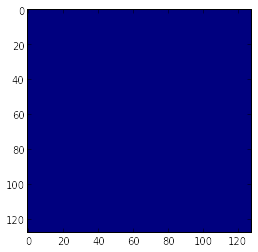

In [48]:
import cv2
%matplotlib inline
l = np.sqrt(len(allPixel))
img = np.reshape(allPixel / 256.0, (l,l))
dd = cv2.resize(img,(128,128))



plt.imshow(img)
plt.imshow(dd)

3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_20.dcm.iov (1, 128, 128) 0.0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_4.dcm.iov (1, 128, 128) 0.0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_10.dcm.iov (1, 128, 128) 0.0078125
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_14.dcm.iov (1, 128, 128) 0.0078125
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_11.dcm.iov (1, 128, 128) 0.0078125
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_13.dcm.iov (1, 128, 128) 0.0078125
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_9.dcm.iov (1, 128, 128) 0.0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_19.dcm.iov (1, 128, 128) 0.0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_6.dcm.iov (1, 128, 128) 0.0
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_12.dcm.iov (1, 128, 128) 0.0078125
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m

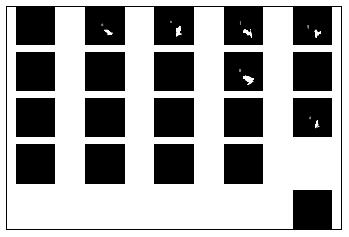

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import os
%matplotlib inline

#path = "/Users/oli/Proj_Large_Data/Deep_Learning_MRI/insel_annotated/ADC-contouring-test-case/3-ep2d_diff_3scan_p3_m128_ADC/iov/"
path = '/home/dueo/data/Inselspital_2015_07_08/metastasis/001_3SUIUNLJQMTGZRVTJM7LWTPHDA======/3SUIUNLJQMTGZRVTJM7LWTPHDA======-20150130-0/3-ep2d_diff_3scan_p3_m128_ADC/iov/'
fig = plt.figure()
plt.xticks([])
plt.yticks([])
files = os.listdir(path)
for i,file in enumerate(files):
    Y = readAnotations(path + file, len(file))
    a = fig.add_subplot(5, 5, i, xticks=[], yticks=[])  
    plt.imshow(Y[0,:,:], cmap=plt.get_cmap('gray'))
    print(file + ' ' + str(Y.shape) + " " + str(Y.max()))


### Reading the DCIM files

3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_17.dcm
1
17
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_10.dcm
3
10
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_19.dcm
5
19
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_11.dcm
7
11
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_6.dcm
9
6
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_14.dcm
11
14
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_2.dcm
13
2
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_12.dcm
15
12
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_13.dcm
17
13
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_20.dcm
19
20
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_18.dcm
21
18
Reading 
3SUIUNLJQMTGZRVTJM7LWTPHDA======_ep2d_diff_3scan_p3_m128_ADC_3_3.dcm
23
3


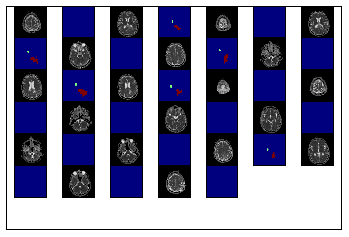

In [24]:
from os import walk
import dicom
import matplotlib.pyplot as plt
%matplotlib inline
files = []

#path = "/Users/oli/Proj_Large_Data/Deep_Learning_MRI/ep2d_diff_3scan_trace_p3_ADC/"
path = "/home/dueo/data/Inselspital_2015_07_08/metastasis/001_3SUIUNLJQMTGZRVTJM7LWTPHDA======/3SUIUNLJQMTGZRVTJM7LWTPHDA======-20150130-0/3-ep2d_diff_3scan_p3_m128_ADC/"

for (dirpath, dirnames, filenames) in walk(path):
    files.extend(filenames)
    break

fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(hspace=1e-3, wspace=1e-3)

c = 0
for i,file in enumerate(files):
    print(file)
    plan = dicom.read_file(dirpath + file)
    print((2 * i + 1))
    fig.add_subplot(7, 7, (2 * i + 1), xticks=[], yticks=[])
    pix = plan.pixel_array
    print(plan.InstanceNumber)
    plt.imshow(pix, cmap=plt.get_cmap('gray'))
    
    # Reading the annotated file
    print("Reading ")
    Y = readAnotations(path + "iov/" + file + ".iov", len(file) + 4)
    a = fig.add_subplot(7, 7, (2 * i + 2), xticks=[], yticks=[])  
    plt.imshow(Y[0,:,:])#, cmap=plt.get_cmap('gray'))
    
    c += 1

